In [1]:
# what happens if G is highly correlated with E? ie. rGE (gene-environment correlation)

In [2]:
import os,sys,glob,gzip
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
# this is a toy data for GxE
df=pd.DataFrame()
tmp= np.random.rand(100)
df['G']= tmp + (np.random.randn(100) * 0.1)  # genotype
df['E']= tmp + (np.random.randn(100) * 0.1)  # environment
df['pheno']= df['G'] * df['E'] + np.random.randn(100) * 0.1

In [4]:
df

,G,E,pheno
0,-0.012529,0.230674,0.241776
1,0.639522,0.728284,0.516521
2,0.223098,0.152647,0.354733
3,0.263897,0.186506,-0.047880
4,0.123106,0.072101,0.058496
...,...,...,...
95,0.936608,0.754162,0.724524
96,0.412446,0.313920,-0.043989
97,0.453432,0.453335,0.231014
98,0.364683,0.284239,0.232488


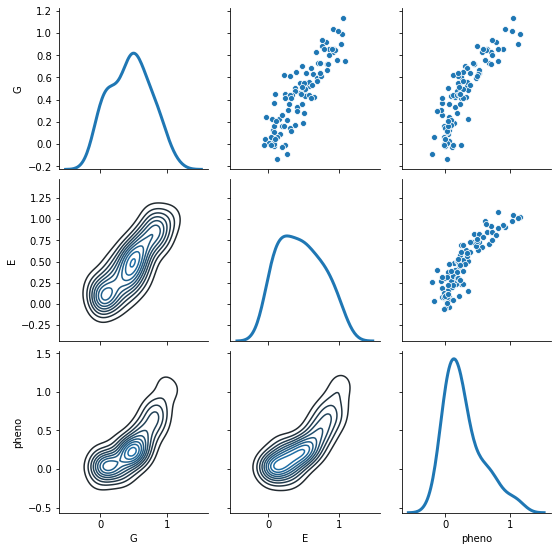

In [5]:
g=sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [6]:
# linear regression, GxE
df['GxE']= df['G'] * df['E']
reg=smf.ols(formula='pheno ~ G + E + GxE', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     284.4
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.28e-47
Time:                        14:18:22   Log-Likelihood:                 93.243
No. Observations:                 100   AIC:                            -178.5
Df Residuals:                      96   BIC:                            -168.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0331      0.025      1.328      0.187      -0.016       0.083
G             -0.0460      0.083     -0.556      0.579      -0.210       0.118
E             -0.0790      0.094     -0.836      0.405      -0.266       0.108
GxE            1.0827      0.115      9.445      0.000       0.855       1.310
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.515
Skew:                           0.142   Prob(JB):                        0.284
Kurtosis:                       3.723   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# next, change the phenotype values
# here is a G and E additive model (NOT GxE)

In [8]:
df['pheno']= df['G'] + df['E'] + np.random.randn(100) * 0.1

In [9]:
# linear regression, GxE
reg=smf.ols(formula='pheno ~ G + E + GxE', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     874.8
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           1.50e-69
Time:                        14:18:22   Log-Likelihood:                 79.257
No. Observations:                 100   AIC:                            -150.5
Df Residuals:                      96   BIC:                            -140.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0313      0.029      1.089      0.279      -0.026       0.088
G              0.9933      0.095     10.441      0.000       0.804       1.182
E              0.9174      0.109      8.450      0.000       0.702       1.133
GxE            0.0502      0.132      0.381      0.704      -0.211       0.312
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.176
Skew:                           0.062   Prob(JB):                        0.916
Kurtosis:                       2.836   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''

Interpretation:

  Here we prepared toy data for G-E correlation.
  
  Whether or not GxE term get high beta depends on phenotype values.
  However, interpretation is a bit difficult when there is a good correlation
  between G and E.
  
  The second regression in this page (non-GxE), G and E got similar beta and p-value.
  This is expected, because there is a good correlation between G and E.
  In this case, we cannot evaluate whether G or E is the causal factor.
  Similarly, the first regression detected GxE interaction, but we do not know
  whether this is true GxE interaction.
  
  Caveats: Here, I did not standalize data for simplicity. In real cases,
           we need to standalize data to obtain appropriate beta.
           (see also chapter 11)
  
'''